## Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import datetime
import requests
import json

import xdmod.datawarehouse as xdw
import xdmod.visualizer as v

## Configuration

In [26]:
hosts = ["https://metrics-dev.ccr.buffalo.edu:9004"]

today = date.today()
sunday = today - datetime.timedelta(days=1)
last_monday = today - datetime.timedelta(days=7)
last_sunday = sunday - datetime.timedelta(days=1)
lastlast_monday = last_monday - datetime.timedelta(days=7)

## Report Visualization

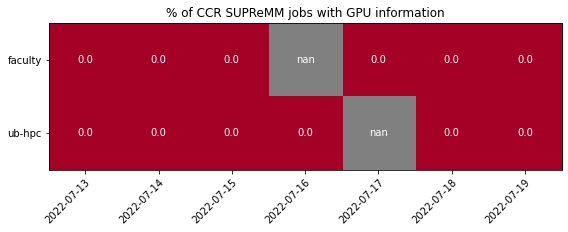

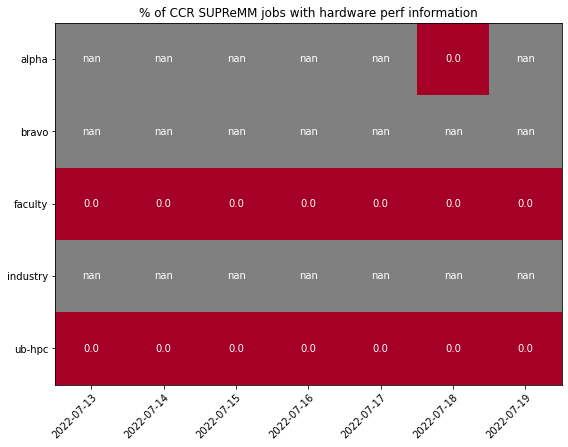

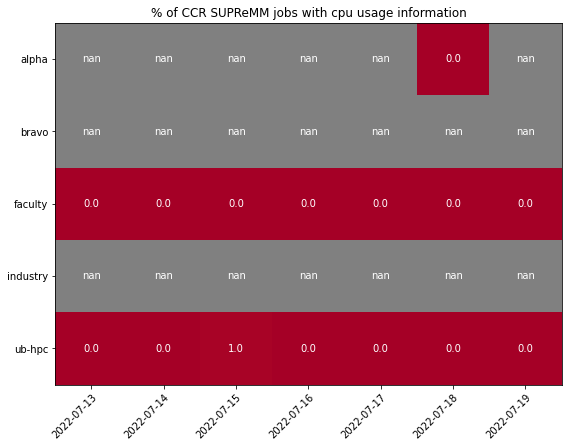

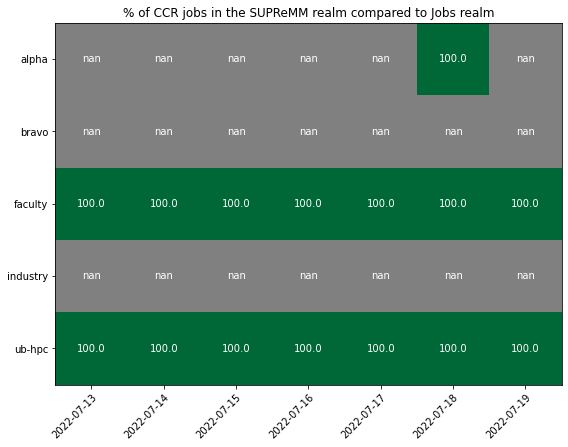

In [31]:
resources = []

for host in hosts:
    for type in ['gpu', 'hardware', 'cpu','realms']:
        config = {"start": last_monday, "end": sunday, "type": type}                
        with xdw.DataWareHouse(host) as test:
                data = test.get_qualitydata(config)
                resources.append(data)
                
for res in resources:
    v.quality_heatmap(res)

## Send Alerts

In [36]:
host = "https://metrics-dev.ccr.buffalo.edu:9004"
type_to_title = {'gpu': '% of CCR SUPReMM jobs with GPU information', 
                'hardware': '% of CCR SUPReMM jobs with hardware perf information', 
                'cpu': '% of CCR SUPReMM jobs with cpu usage information', 
                'script': '% of CCR SUPReMM jobs with Job Batch Script information', 
                'realms': '% of CCR jobs in the SUPReMM realm compared to Jobs realm'}

payload = {"blocks": [{"type": "section","text": {"type": "mrkdwn","text": "*SUPReMM Quality Alerts*"}}]}

with xdw.DataWareHouse(host) as warehouse:
    for type in ['gpu', 'hardware', 'cpu', 'realms']:
        today_data = warehouse.get_qualitydata({"start": last_monday.strftime("%Y-%m-%d"), "end": sunday.strftime("%Y-%m-%d"), "type": type})
        lastweek_data = warehouse.get_qualitydata({"start": lastlast_monday.strftime("%Y-%m-%d"), "end": last_sunday.strftime("%Y-%m-%d"), "type": type})
        for res in today_data.index:
            if lastweek_data.mean(axis='columns')[res] - today_data.mean(axis='columns')[res] >= 10: # change to minus
                alert = today_data.loc[res]
                payload['blocks'].append({"type": "section","text": {"type": "mrkdwn","text": f'Attention needed at: *{type_to_title[type]}* from the {alert.name} resource'}})

payload['blocks'].append({"type": "section","text": {"type": "mrkdwn","text": f'{host}/reports/.html'}})                
                
response = requests.post('', 
                         data = json.dumps(payload))
print(response.text)

MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?

{'TERM_PROGRAM': 'Apple_Terminal',
 'SHELL': '/bin/bash',
 'TERM': 'xterm-color',
 'TMPDIR': '/var/folders/qc/6bk8jy_55f731bhgzvw3sd880000gn/T/',
 'CONDA_SHLVL': '1',
 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.DMnsHX4ZCj/Render',
 'CONDA_PROMPT_MODIFIER': '(base) ',
 'TERM_PROGRAM_VERSION': '421.2',
 'OPAM_SWITCH_PREFIX': '/Users/test/.opam/default',
 'TERM_SESSION_ID': '05FFE3F9-4C07-4369-B858-350E96B47C83',
 'USER': 'test',
 'CONDA_EXE': '/Users/test/opt/anaconda3/bin/conda',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.AZDioli4OB/Listeners',
 '_CE_CONDA': '',
 'PATH': '/Users/test/.opam/default/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/Users/test/opt/anaconda3/bin:/Users/test/opt/anaconda3/condabin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin',
 'CONDA_PREFIX': '/Users/test/opt/anaconda3',
 'PWD': '/Users/test',
 'LANG': 'en_US.UTF-8',
 'XPC_FLAGS': '0x0',
 '_CE_M': '',
 'XPC_SERVICE_NAME': '0',
 'SHLVL': '1',
 'HOME': '/Users/